# Aprendiendo Machine Learning con Python 

El Machine Learning, a través de métodos estadísticos y algoritmos, habilita al computador a aprender por medio de la identificación de patrones, descubriendo información clave dentro de un conjunto de datos, para luego hacer predicciones o clasificaciones.

~~~
    "Una cosa es programar una máquina para que pueda moverse, 
    otra muy diferente es programarla para que aprenda a moverse." 
~~~

Podemos dividirlo en 6 pasos:

- Recopilar y preparar un conjunto de datos históricos de valor.
- Crear un modelo con los datos (entrenaremos un algoritmo).
- Evaluar.
- Configuración de parámetros.
- Hacer predicciones.
- Interpretación del modelo.

## Aprendizaje supervisado

Conocemos la entrada y la salida. La máquina recibe datos que se caracterizan por las variables `X` (características), y anotados con una variable `y` (objetivo). La idea es que la máquina aprenda a predecir el valor `y` de acuerdo a las características `X` que se le asignen. 

___

### Preparación de datos

Entender qué información contiene cada variable y detectar posibles errores, deben ser el primer paso y el más importante del diseño del modelo, ya que la calidad y cantidad de información que consigas impactará directamente en lo bien o mal que luego funcione nuestro modelo.

___

**Ejercicio**

Predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.

[Fuente](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv)
___
Importemos la librería con las que vamos a trabajar: [pandas](https://pandas.pydata.org/)

In [3]:
import pandas as pd

Cargamos los datos del conjunto en un DataFrame.

In [4]:
# leer los datos que están en un archivo .csv
df = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/datos.csv')
df

,id,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Rural,166.29,25.6,formerly smoked,0


La tabla anterior tiene información sobre dos tipos de variables: 

1.  Las variables predictoras, también llamadas "características".

- id: Identificación
- gender: Género
- age: Edad
- hypertension:"0" si el paciente no tiene hipertensión, "1" si el paciente tiene hipertensión
- heart_disease: "0" si el paciente no tiene ninguna enfermedad cardíaca, "1" si el paciente tiene una enfermedad cardíaca
- Residence_type: Tipo de residencia
- avg_glucose_level: Nivel medio de glucosa en la sangre
- bmi: Índice de masa corporal
- smoking_status: "anteriormente fumado", "nunca fumado", "fuma"o "Desconocido" 

2- La variable objetivo, la cual representa lo que queremos predecir con el modelo de Machine Learning.

- stroke: "1" si el paciente tuvo un accidente cerebrovascular o "0" si no.

___

Verificamos el tipo de datos en cada columna. `df.info()`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 399.3+ KB


Observemos que la columna 'No-Null Count' nos muestra cuántos **datos no nulos** tenemos en cada columna del DatFrame, si nos fijamos en la columna 'bmi' faltarían datos. 

Podemos pedir cuántos **datos nulos** específicamente tenemos en cada columna con el comando `isna().sum()`.
En caso de haber datos nulos, esto se puede resolver de dos formas: 
- Eliminarlos completamente `df = df.dropna(axis=0)`
- Sustituirlos por algún valor, por ejemplo, la media `df.fillna(df['bmi'].mean())`. 

Preferiblemente se eliminan, ya que no estaríamos alterando la información. 

In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#df.fillna(df['bmi'].mean()) #completar con la media
df = df.dropna(axis=0) #eliminar las filas que no contengan datos
df.shape

(4909, 10)

Con el comando `df.describe()`, se obtienen algunos valores estadísticos por columna. 

In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Los valores anteriores representan lo siguiente:

- count - muestra cuántas filas tienen valores que no faltan. 
- mean - media de cada columna.
- std - desviación estandar de cada columna.
- min - dato mínimo de cada columna.
- max - dato máximo en cada columna. 
- 25%, 50%, 75% - Cuartil primero, segundo y tercero, respectivamente. 

___

A continuación, se elimina la columna 'id' que no contiene información relevante para el modelo. `df.drop(columns = [''])` 

Las columnas 'gender', 'ever_married', 'work_type', 'Residence_type ' y 'smoking_status' no tienen valores numéricos. Asignemos números a estos datos. 

In [9]:
df = df.drop(columns = ['id'])

In [10]:
#df['gender'].unique()
#df['Residence_type'].unique()
df['smoking_status'].unique() #verificar los distintos valores en cada columna

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [11]:
#género
val_gender={"gender": {'Male':0, 'Female':1, 'Other':2}}
df.replace(val_gender, inplace=True)
#tipo de residencia
val_residence={"Residence_type": {'Urban':0, 'Rural':1}}
df.replace(val_residence, inplace=True)
#fumador
val_smoking={"smoking_status": {'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}}
df.replace(val_smoking, inplace=True)
df

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,228.69,36.6,0,1
2,0,80.0,0,1,1,105.92,32.5,1,1
3,1,49.0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,1,174.12,24.0,1,1
5,0,81.0,0,0,0,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,1,103.08,18.6,3,0
5106,1,81.0,0,0,0,125.20,40.0,1,0
5107,1,35.0,0,0,1,82.99,30.6,1,0
5108,0,51.0,0,0,1,166.29,25.6,0,0


In [12]:
#df['gender'].replace(['Male', 'Female', 'Other'],[0, 1, 2], inplace=True) Otra manera de reemplazar

Hagamos un histograma de la distribución de valores de cada columna. 

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'Residence_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'smoking_status'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

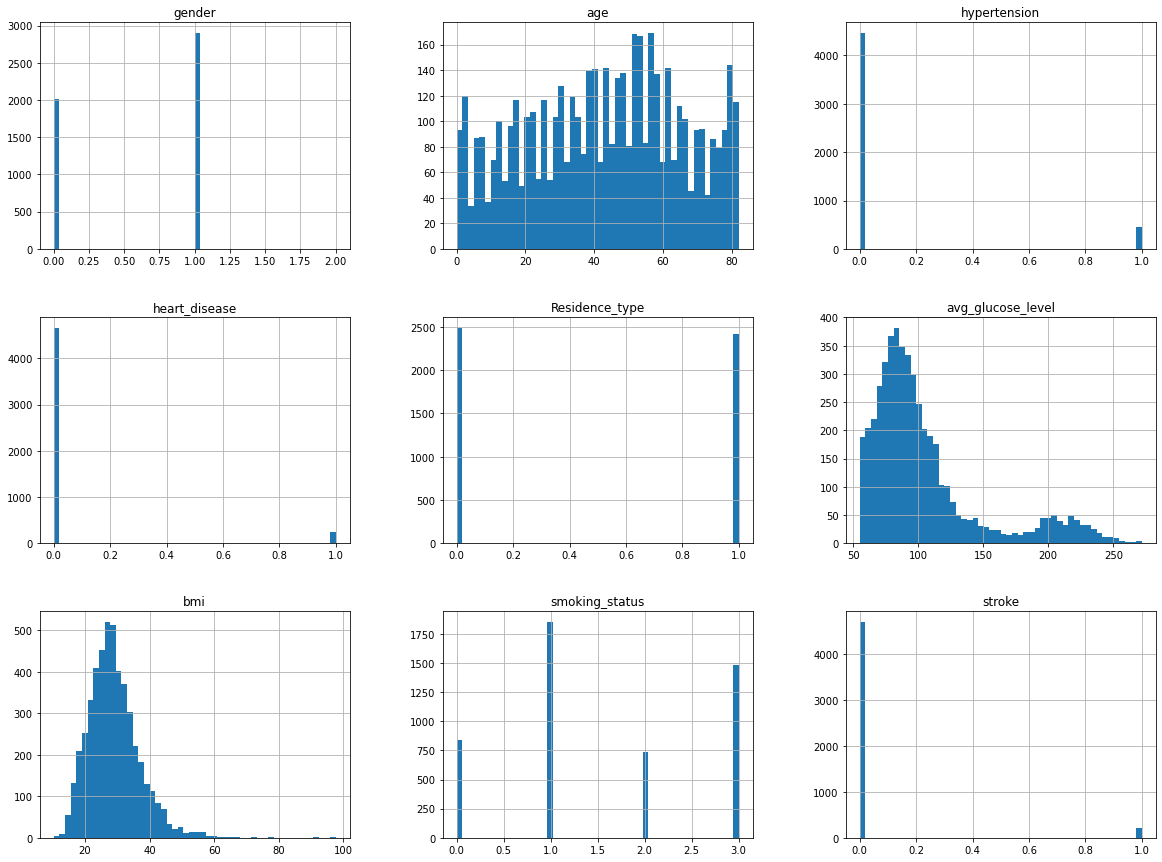

In [13]:
df.hist(bins=50,figsize=(20,15))

### Datos de entrenamiento y datos de prueba - Características y variable objetivo

Un error metodológico es evaluar y predecir el rendimiento del modelo sobre los mismos datos de entrenamiento, ya que el modelo está familiarizado con ellos. Lo anterior se llama sobreajuste, y para tratar de evitarlo se recomienda usar datos nuevos para poder tener una idea del comportamiento futuro.  Como solo tenemos un conjunto de datos, vamos a dividir éstos en dos partes: datos de entrenamiento y de test. 

El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad que se necesite en la estimación del error, 80%-20% suele dar buenos resultados. El reparto debe hacerse de forma aleatoria.

In [19]:
df_entrenamiento = df.sample(frac=0.8) #Un 80% de los datos totales
df_test = df.drop(df_entrenamiento.index) #los datos totales, menos los datos de entrenamientoentrenamiento
df_entrenamiento

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2029,0,72.0,0,0,0,81.05,30.3,3,0
3412,1,18.0,0,0,1,107.82,26.0,1,0
2550,0,55.0,0,0,0,84.44,30.5,0,0
5096,0,57.0,0,0,1,76.62,28.2,1,0
184,0,61.0,1,1,0,112.24,37.4,2,1
...,...,...,...,...,...,...,...,...,...
2411,0,14.0,0,0,0,79.36,48.8,1,0
1111,1,18.0,0,0,1,98.10,21.8,1,0
5070,1,5.0,0,0,0,61.98,16.8,3,0
12,1,54.0,0,0,0,104.51,27.3,2,1


Anteriormente, teníamos tanto las característica como la variable obejtivo en un solo DataFrame; para poder entrenar los datos y ajustar el modelo, dividimos el dataframe en dos conjuntos: características y la variable objetivo.

In [20]:
df_entren_prediccion = df_entrenamiento.pop('stroke') #quitar la variable de predicción
df_test_prediccion = df_test.pop('stroke')
df_entren_prediccion

2029    0
3412    0
2550    0
5096    0
184     1
       ..
2411    0
1111    0
5070    0
12      1
3236    0
Name: stroke, Length: 3927, dtype: int64

Nuestros datos están divididos de la siguiente manera: 

1. Entrenamiento
- df_entrenamiento (características)
- df_entren_prediccion (variable objetivo)

2. Prueba
- df_test (característica)
- df_test_prediccion (variable objetivo)

Otro método para hacer la división de los datos, lo encontramos en el Notebook de [modelos](https://github.com/bonaldee/ProyectoModelado_ElianaBonalde/blob/main/modelos.ipynb), donde se hace una división aleatoria por medio de la función `train_test_split` que nos ofrece [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split).  

___
Finalmente, guardamos los datos en archivos .csv para utilizarlos en el Notebook [modelos](https://github.com/bonaldee/ProyectoModelado_ElianaBonalde/blob/main/ajuste_modelos.ipynb). 

In [16]:
df.to_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df.csv', index=False)
df_entrenamiento.to_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_entrenamiento.csv', index=False)
df_test.to_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_test.csv', index=False) 
df_entren_prediccion.to_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_entren_prediccion.csv', index=False)
df_test_prediccion.to_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_test_prediccion.csv', index=False)